In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

In [17]:
def demean(X):
    return X - np.mean(X, axis = 0)

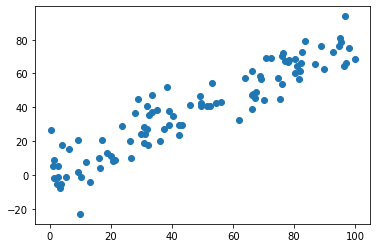

In [18]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [19]:
X_demean = demean(X)

In [20]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w) ** 2) / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)  # 注意1：初始向量不能使用0向量
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意2：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w


In [21]:
initial_w = np.random.random(X.shape[1])
eta = 0.001
w = first_component(X_demean, initial_w, eta)
w

array([ 0.99993005, -0.01182734])

In [22]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w
# X2 = X - X.dot(w).reshape(-1, 1) * w

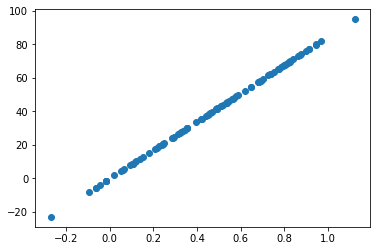

In [23]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [24]:
w2 = first_component(X2, initial_w, eta)
w2

array([0.01182734, 0.99993005])

In [25]:
w.dot(w2)

7.2008949740520745e-09

In [26]:
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res

In [27]:
first_n_components(2, X)

[array([-0.33296765, -0.94293825]), array([ 0.94293848, -0.33296701])]

In [31]:
-0.33*0.94+-0.94*-0.33

0.0